<a href="https://colab.research.google.com/github/Adeeba27/CP---2-Retail-Sales-Prediction/blob/main/CP_2_%7C_Retail_Sales_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Project Name**    - Retail Sales Prediction




 **Project Type**    - Regression
##### **Contribution**    - Individual
##### **Team Member 1 - Adeeba Khan


```
# This is formatted as code
```



# **Project Summary -**

Write the summary here within 500-600 words.

# **GitHub Link -**

Provide your GitHub Link here.

# **Problem Statement**


**Write Problem Statement Here.**

# **General Guidelines** : -

1.   Well-structured, formatted, and commented code is required.
2.   Exception Handling, Production Grade Code & Deployment Ready Code will be a plus. Those students will be awarded some additional credits.

     The additional credits will have advantages over other students during Star Student selection.

             [ Note: - Deployment Ready Code is defined as, the whole .ipynb notebook should be executable in one go
                       without a single error logged. ]

3.   Each and every logic should have proper comments.
4. You may add as many number of charts you want. Make Sure for each and every chart the following format should be answered.


```
# Chart visualization code
```


*   Why did you pick the specific chart?
*   What is/are the insight(s) found from the chart?
* Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

5. You have to create at least 15 logical & meaningful charts having important insights.


[ Hints : - Do the Vizualization in  a structured way while following "UBM" Rule.

U - Univariate Analysis,

B - Bivariate Analysis (Numerical - Categorical, Numerical - Numerical, Categorical - Categorical)

M - Multivariate Analysis
 ]





6. You may add more ml algorithms for model creation. Make sure for each and every algorithm, the following format should be answered.


*   Explain the ML Model used and it's performance using Evaluation metric Score Chart.


*   Cross- Validation & Hyperparameter Tuning

*   Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

*   Explain each evaluation metric's indication towards business and the business impact pf the ML model used.




















# ***Let's Begin !***

## ***1. Know Your Data***

### Import Libraries

In [1]:
# Import Libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from numpy import count_nonzero

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score


### Dataset Loading

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
path = '/content/drive/MyDrive/Rossmann Stores Data (1).csv'
sales_df = pd.read_csv(path)

<ipython-input-3-17bd6c087f8c>:2: DtypeWarning: Columns (7) have mixed types. Specify dtype option on import or set low_memory=False.
  sales_df = pd.read_csv(path)


In [4]:
path1 = '/content/drive/MyDrive/store (1).csv'
store_df = pd.read_csv(path1)

### Dataset First View

### Dataset first view of Sales


In [5]:
# Dataset First Look
sales_df.head()

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday
0,1,5,31-07-2015,5263,555,1,1,0,1
1,2,5,31-07-2015,6064,625,1,1,0,1
2,3,5,31-07-2015,8314,821,1,1,0,1
3,4,5,31-07-2015,13995,1498,1,1,0,1
4,5,5,31-07-2015,4822,559,1,1,0,1


In [6]:
sales_df.tail()

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday
1017204,1111,2,01-01-2013,0,0,0,0,a,1
1017205,1112,2,01-01-2013,0,0,0,0,a,1
1017206,1113,2,01-01-2013,0,0,0,0,a,1
1017207,1114,2,01-01-2013,0,0,0,0,a,1
1017208,1115,2,01-01-2013,0,0,0,0,a,1


### Dataset first view of Stores

In [7]:
store_df.head()

,Store,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
1,2,a,a,570.0,11.0,2007.0,1,13.0,2010.0,"Jan,Apr,Jul,Oct"
2,3,a,a,14130.0,12.0,2006.0,1,14.0,2011.0,"Jan,Apr,Jul,Oct"
3,4,c,c,620.0,9.0,2009.0,0,NaN,NaN,NaN
4,5,a,a,29910.0,4.0,2015.0,0,NaN,NaN,NaN


In [8]:
store_df.tail()

,Store,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
1110,1111,a,a,1900.0,6.0,2014.0,1,31.0,2013.0,"Jan,Apr,Jul,Oct"
1111,1112,c,c,1880.0,4.0,2006.0,0,NaN,NaN,NaN
1112,1113,a,c,9260.0,NaN,NaN,0,NaN,NaN,NaN
1113,1114,a,c,870.0,NaN,NaN,0,NaN,NaN,NaN
1114,1115,d,c,5350.0,NaN,NaN,1,22.0,2012.0,"Mar,Jun,Sept,Dec"


### Dataset Rows & Columns count of Sales Data

In [9]:
# Dataset Rows & Columns count
sales_df.shape[0]

1017209

In [10]:
sales_df.shape[1]

9

### Dataset Rows & Columns count of Stores Data

In [11]:
store_df.shape[0]

1115

In [12]:
store_df.shape[1]

10

### Dataset Information of Sales

In [13]:
# Dataset Info
sales_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1017209 entries, 0 to 1017208
Data columns (total 9 columns):
 #   Column         Non-Null Count    Dtype 
---  ------         --------------    ----- 
 0   Store          1017209 non-null  int64 
 1   DayOfWeek      1017209 non-null  int64 
 2   Date           1017209 non-null  object
 3   Sales          1017209 non-null  int64 
 4   Customers      1017209 non-null  int64 
 5   Open           1017209 non-null  int64 
 6   Promo          1017209 non-null  int64 
 7   StateHoliday   1017209 non-null  object
 8   SchoolHoliday  1017209 non-null  int64 
dtypes: int64(7), object(2)
memory usage: 69.8+ MB


In [14]:
#Describing the data
sales_df.describe()

,Store,DayOfWeek,Sales,Customers,Open,Promo,SchoolHoliday
count,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06
mean,5.584297e+02,3.998341e+00,5.773819e+03,6.331459e+02,8.301067e-01,3.815145e-01,1.786467e-01
std,3.219087e+02,1.997391e+00,3.849926e+03,4.644117e+02,3.755392e-01,4.857586e-01,3.830564e-01
min,1.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,2.800000e+02,2.000000e+00,3.727000e+03,4.050000e+02,1.000000e+00,0.000000e+00,0.000000e+00
50%,5.580000e+02,4.000000e+00,5.744000e+03,6.090000e+02,1.000000e+00,0.000000e+00,0.000000e+00
75%,8.380000e+02,6.000000e+00,7.856000e+03,8.370000e+02,1.000000e+00,1.000000e+00,0.000000e+00
max,1.115000e+03,7.000000e+00,4.155100e+04,7.388000e+03,1.000000e+00,1.000000e+00,1.000000e+00


In [15]:
# Dataset Duplicate Value Count
sales_df.duplicated()

0          False
1          False
2          False
3          False
4          False
           ...  
1017204    False
1017205    False
1017206    False
1017207    False
1017208    False
Length: 1017209, dtype: bool

In [16]:
# Missing Values/Null Values Count
sales_df.isnull().sum()

Store            0
DayOfWeek        0
Date             0
Sales            0
Customers        0
Open             0
Promo            0
StateHoliday     0
SchoolHoliday    0
dtype: int64

### Dataset information of Stores

In [17]:
store_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1115 entries, 0 to 1114
Data columns (total 10 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Store                      1115 non-null   int64  
 1   StoreType                  1115 non-null   object 
 2   Assortment                 1115 non-null   object 
 3   CompetitionDistance        1112 non-null   float64
 4   CompetitionOpenSinceMonth  761 non-null    float64
 5   CompetitionOpenSinceYear   761 non-null    float64
 6   Promo2                     1115 non-null   int64  
 7   Promo2SinceWeek            571 non-null    float64
 8   Promo2SinceYear            571 non-null    float64
 9   PromoInterval              571 non-null    object 
dtypes: float64(5), int64(2), object(3)
memory usage: 87.2+ KB


In [18]:
store_df.describe()

,Store,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear
count,1115.00000,1112.000000,761.000000,761.000000,1115.000000,571.000000,571.000000
mean,558.00000,5404.901079,7.224704,2008.668857,0.512108,23.595447,2011.763573
std,322.01708,7663.174720,3.212348,6.195983,0.500078,14.141984,1.674935
min,1.00000,20.000000,1.000000,1900.000000,0.000000,1.000000,2009.000000
25%,279.50000,717.500000,4.000000,2006.000000,0.000000,13.000000,2011.000000
50%,558.00000,2325.000000,8.000000,2010.000000,1.000000,22.000000,2012.000000
75%,836.50000,6882.500000,10.000000,2013.000000,1.000000,37.000000,2013.000000
max,1115.00000,75860.000000,12.000000,2015.000000,1.000000,50.000000,2015.000000


In [19]:
# Dataset Duplicate Value Count
store_df.duplicated()


0       False
1       False
2       False
3       False
4       False
        ...  
1110    False
1111    False
1112    False
1113    False
1114    False
Length: 1115, dtype: bool

In [20]:
# Missing Values/Null Values Count
store_df.isnull().sum()

Store                          0
StoreType                      0
Assortment                     0
CompetitionDistance            3
CompetitionOpenSinceMonth    354
CompetitionOpenSinceYear     354
Promo2                         0
Promo2SinceWeek              544
Promo2SinceYear              544
PromoInterval                544
dtype: int64

In [21]:
# Filling null values
store_df.fillna(0)


,Store,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,1,c,a,1270.0,9.0,2008.0,0,0.0,0.0,0
1,2,a,a,570.0,11.0,2007.0,1,13.0,2010.0,"Jan,Apr,Jul,Oct"
2,3,a,a,14130.0,12.0,2006.0,1,14.0,2011.0,"Jan,Apr,Jul,Oct"
3,4,c,c,620.0,9.0,2009.0,0,0.0,0.0,0
4,5,a,a,29910.0,4.0,2015.0,0,0.0,0.0,0
...,...,...,...,...,...,...,...,...,...,...
1110,1111,a,a,1900.0,6.0,2014.0,1,31.0,2013.0,"Jan,Apr,Jul,Oct"
1111,1112,c,c,1880.0,4.0,2006.0,0,0.0,0.0,0
1112,1113,a,c,9260.0,0.0,0.0,0,0.0,0.0,0
1113,1114,a,c,870.0,0.0,0.0,0,0.0,0.0,0


### What did you know about your dataset?

Sales dataset - There are 1017209 rows and 9 columns in the dataset which means there are 9 variables in the dataset. Further, there are no dupicate values and null values in the dataset to handle.

Stores dataset - There are 1115 rows and 10 columns in the dataset which means there are 10 variables in the dataset. Further, there are no duplicate values but I found some missing and null values which i handled it using fillna method.

## ***2. Merging both the dataset***

In [22]:
 new_df = pd.merge(sales_df, store_df, on='Store', how='left')

In [23]:
# Give a glance to merged dataset
new_df.head()

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,1,5,31-07-2015,5263,555,1,1,0,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
1,2,5,31-07-2015,6064,625,1,1,0,1,a,a,570.0,11.0,2007.0,1,13.0,2010.0,"Jan,Apr,Jul,Oct"
2,3,5,31-07-2015,8314,821,1,1,0,1,a,a,14130.0,12.0,2006.0,1,14.0,2011.0,"Jan,Apr,Jul,Oct"
3,4,5,31-07-2015,13995,1498,1,1,0,1,c,c,620.0,9.0,2009.0,0,NaN,NaN,NaN
4,5,5,31-07-2015,4822,559,1,1,0,1,a,a,29910.0,4.0,2015.0,0,NaN,NaN,NaN


## ***3. Understanding Your Variables***

In [24]:
# Dataset Columns
new_df.columns.values.tolist()

['Store',
 'DayOfWeek',
 'Date',
 'Sales',
 'Customers',
 'Open',
 'Promo',
 'StateHoliday',
 'SchoolHoliday',
 'StoreType',
 'Assortment',
 'CompetitionDistance',
 'CompetitionOpenSinceMonth',
 'CompetitionOpenSinceYear',
 'Promo2',
 'Promo2SinceWeek',
 'Promo2SinceYear',
 'PromoInterval']

In [25]:
# Dataset Describe
new_df.describe()

,Store,DayOfWeek,Sales,Customers,Open,Promo,SchoolHoliday,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear
count,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06,1.014567e+06,693861.000000,693861.000000,1.017209e+06,509178.000000,509178.000000
mean,5.584297e+02,3.998341e+00,5.773819e+03,6.331459e+02,8.301067e-01,3.815145e-01,1.786467e-01,5.430086e+03,7.222866,2008.690228,5.005638e-01,23.269093,2011.752774
std,3.219087e+02,1.997391e+00,3.849926e+03,4.644117e+02,3.755392e-01,4.857586e-01,3.830564e-01,7.715324e+03,3.211832,5.992644,4.999999e-01,14.095973,1.662870
min,1.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,2.000000e+01,1.000000,1900.000000,0.000000e+00,1.000000,2009.000000
25%,2.800000e+02,2.000000e+00,3.727000e+03,4.050000e+02,1.000000e+00,0.000000e+00,0.000000e+00,7.100000e+02,4.000000,2006.000000,0.000000e+00,13.000000,2011.000000
50%,5.580000e+02,4.000000e+00,5.744000e+03,6.090000e+02,1.000000e+00,0.000000e+00,0.000000e+00,2.330000e+03,8.000000,2010.000000,1.000000e+00,22.000000,2012.000000
75%,8.380000e+02,6.000000e+00,7.856000e+03,8.370000e+02,1.000000e+00,1.000000e+00,0.000000e+00,6.890000e+03,10.000000,2013.000000,1.000000e+00,37.000000,2013.000000
max,1.115000e+03,7.000000e+00,4.155100e+04,7.388000e+03,1.000000e+00,1.000000e+00,1.000000e+00,7.586000e+04,12.000000,2015.000000,1.000000e+00,50.000000,2015.000000


### Variables Description

● Id - an Id that represents a (Store, Date) duple within the test set.

● Store - a unique Id for each store.

● Sales - the turnover for any given day (this is what you are predicting).

● Customers - the number of customers on a given day.

● Open - an indicator for whether the store was open: 0 = closed, 1 = open.

● StateHoliday - indicates a state holiday. Normally all stores, with few exceptions, are closed on state holidays. Note that all schools are closed on public holidays and weekends. a = public holiday, b = Easter holiday, c = Christmas, 0 = None.

● SchoolHoliday - indicates if the (Store, Date) was affected by the closure of public schools.

● StoreType - differentiates between 4 different store models: a, b, c, d.

● Assortment - describes an assortment level: a = basic, b = extra, c = extended.

● CompetitionDistance - distance in meters to the nearest competitor store.

● CompetitionOpenSince[Month/Year] - gives the approximate year and month of the time the nearest competitor was opened.

● Promo - indicates whether a store is running a promo on that day.

● Promo2 - Promo2 is a continuing and consecutive promotion for some stores: 0 = store is not participating, 1 = store is participating.

● Promo2Since[Year/Week] - describes the year and calendar week when the store started participating in Promo2.

● PromoInterval - describes the consecutive intervals Promo2 is started, naming the months the promotion is started anew. E.g. “Feb,May,Aug,Nov” means each round starts in February, May, August, November of any given year for that store.


### Check Unique Values for each variable.

In [26]:
# Checking variables which have unique value
new_df['StoreType'].unique()

array(['c', 'a', 'd', 'b'], dtype=object)

In [27]:
new_df['Open'].unique()

array([1, 0])

In [28]:
new_df['Promo'].unique()

array([1, 0])

In [29]:
new_df['Promo2'].unique()

array([0, 1])

In [30]:
new_df['SchoolHoliday'].unique()

array([1, 0])

In [31]:
new_df['StateHoliday'].unique()

array(['0', 'a', 'b', 'c', 0], dtype=object)

In [32]:
new_df['Assortment'].unique()

array(['a', 'c', 'b'], dtype=object)

## 4. ***Data Wrangling***

### Data Wrangling Code

In [33]:
#Changing data type 'object' into 'int'
new_df['StoreType'].replace(to_replace=['a', 'b', 'c', 'd'], value=[0, 1, 2, 3], inplace=True)

In [34]:
#Changing data type 'object' into 'int'
new_df['StateHoliday'].replace(to_replace=['0', 'a', 'b', 'c'], value=[0, 1, 2, 3], inplace=True)

In [35]:
#Changing data type 'object' into 'int'
new_df['Assortment'].replace(to_replace=['a', 'c', 'b'], value=[0, 2, 1], inplace=True)

In [36]:
#Changing format of date to datetime
new_df['Date'] = pd.to_datetime(new_df['Date'], format= '%d-%m-%Y')

In [37]:
#Changing format of data into date format
new_df['CompetitionOpenSinceMonth'] = pd.DatetimeIndex(new_df['Date']).month

In [38]:
#Changing float into integer
new_df = new_df.dropna(subset=['CompetitionOpenSinceYear'])
new_df['CompetitionOpenSinceYear'] = new_df['CompetitionOpenSinceYear'].astype(int)
new_df.CompetitionOpenSinceYear.dtype

<ipython-input-38-44d5bbac056a>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_df['CompetitionOpenSinceYear'] = new_df['CompetitionOpenSinceYear'].astype(int)


dtype('int64')

In [39]:
#Changing float into integer
new_df = new_df.dropna(subset=['CompetitionDistance'])
new_df['CompetitionDistance'] = new_df['CompetitionDistance'].astype(int)
new_df.CompetitionDistance.dtype

dtype('int64')

In [40]:
#Changing float into integer
new_df = new_df.dropna(subset=['Promo2SinceWeek'])
new_df['Promo2SinceWeek'] = new_df['Promo2SinceWeek'].astype(int)
new_df.Promo2SinceWeek.dtype

<ipython-input-40-66ca59e5c965>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_df['Promo2SinceWeek'] = new_df['Promo2SinceWeek'].astype(int)


dtype('int64')

In [41]:
#Changing float into integer
new_df = new_df.dropna(subset=['Promo2SinceYear'])
new_df['Promo2SinceYear'] = new_df['Promo2SinceYear'].astype(int)
new_df.Promo2SinceYear.dtype

dtype('int64')

### What all manipulations have you done and insights you found?

First, I checked all null and missing values and coverted NaN into 0 using fillna method.

It is very necessary to convert the data into numeric or in integer form because usually, machine learning relies on mathematical operations. The model I am making further will give me an error if I not covert it into numerical form.

Next, I have converted data from object to dateformat for better data analysis.


**NOW, I AM READ FOR DATA VISUALIZATION !!!**


## ***5. Data Vizualization, Storytelling & Experimenting with charts : Understand the relationships between variables***

#### Chart - 1

<Axes: xlabel='Assortment', ylabel='Sales'>

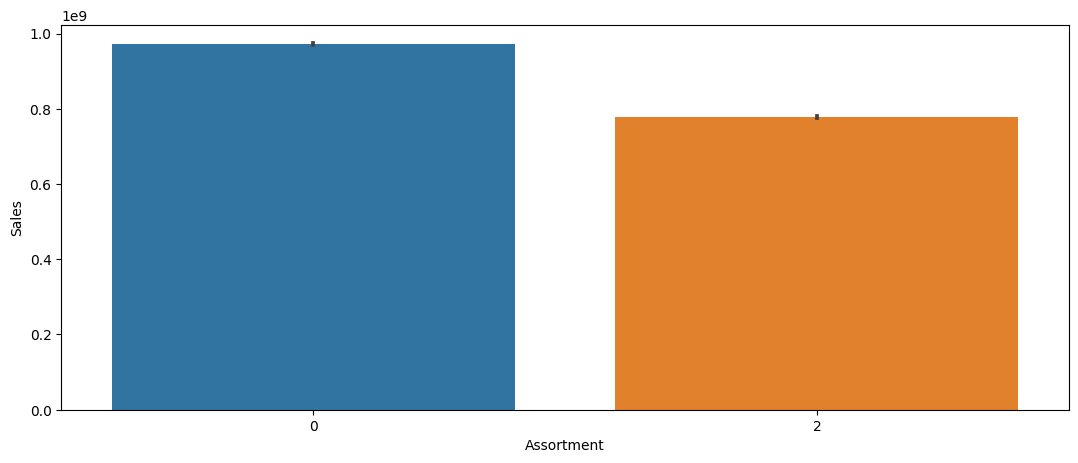

In [42]:
# Chart - 1
#SALES BY ASSORTMENT

plt.figure(figsize=(13, 5))
sns.barplot(x="Assortment", y="Sales", data=new_df, estimator=sum)

 **1. Bar charts are used for comparing different variables.
For sales data, bar charts are best to use. The 'x' axis represents 'Assortment' and the 'y' axis represents the 'Sales'.**


**2. From the above shown chart, it concludes that 0th product of Rossman sales is highest followed by the 2nd product assortment. 1st product has the least sales.
So, the Rossman stores should cooncentrate on 0th product of assortment as this product as significant demand by the customers.**


#### Chart - 2

In [43]:
# Chart - 2
# AVERAGE SALES PER WEEK

average_sales_per_week=new_df.groupby(['DayOfWeek'])['Sales'].mean().reset_index()
average_sales_per_week=average_sales_per_week.sort_values(by='Sales',ascending=False ,ignore_index=True)
average_sales_per_week=average_sales_per_week.set_index('DayOfWeek')
average_sales_per_week



,Sales
DayOfWeek,
1,7361.678684
2,6569.301424
5,6347.979191
3,6148.820654
4,5835.200714
6,5491.644170
7,16.473783


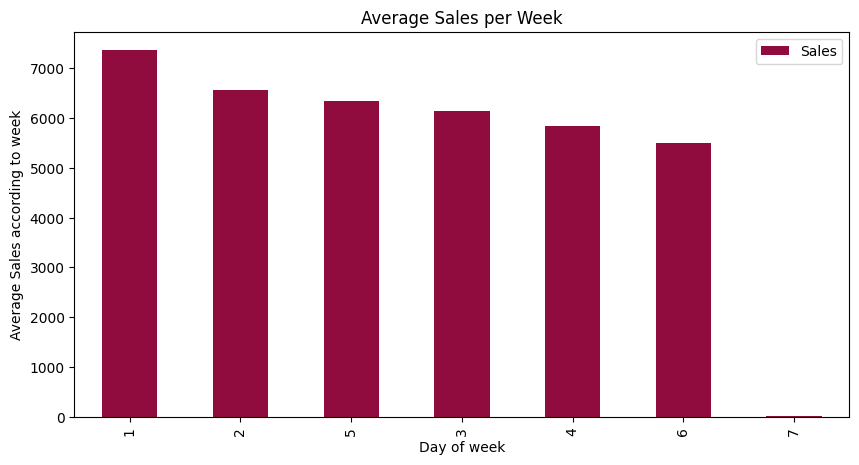

In [44]:
plt.rcParams['figure.figsize'] = (10, 5)
average_sales_per_week.plot(kind='bar',width=.5,color='#900C3F')
plt.title('Average Sales per Week')
plt.ylabel('Average Sales according to week')
plt.xlabel('Day of week')
plt.show()

**1. I have used here bar charts as bar charts are very effective to show the relations and compare the two variables. Above, I can easily show the relation between Average sales by its week.**

**2. In above shown chart, 'x' axis represents Day of week and 'y' axis represents average sales. From the above chart, I conclude that the average sales is highest on the very first day of week i.e 7500 and the average sales is lowest on the last day of week i.e 100. So here, I give statement that there is a decline in sales as days passes in a week.**

#### Chart - 3

In [45]:
# Chart - 3
#AVERAGE CUSTOMERS PER WEEK

average_customers_per_week=new_df.groupby(['DayOfWeek'])['Customers'].mean().reset_index()
average_customers_per_week=average_customers_per_week.sort_values(by='Customers',ascending=False ,ignore_index=True)
average_customers_per_week=average_customers_per_week.set_index('DayOfWeek')
average_customers_per_week

,Customers
DayOfWeek,
1,718.198098
2,670.101782
5,657.043466
3,635.546205
4,611.529526
6,580.540733
7,2.350587


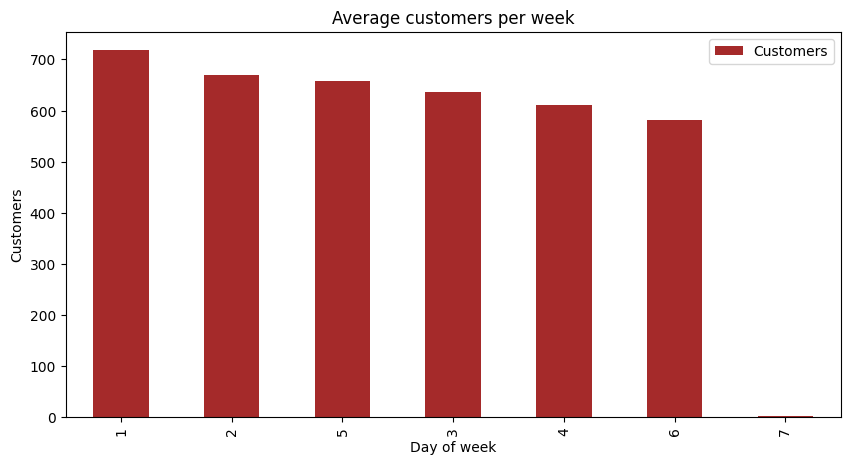

In [46]:
average_customers_per_week.plot(kind='bar',width=.5,color='Brown')
plt.title('Average customers per week')
plt.xlabel('Day of week')
plt.ylabel('Customers')
plt.show()

##### 1. Why did you pick the specific chart?

**Bar chart is used here to show the relation between customers and day of week.**

##### 2. What is/are the insight(s) found from the chart?

**In the above graph, 'x' axis represents day of week and 'y' axis represents average customers. On the first day of week, rush of customers is high and decreases as days of week passes by.**

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

**Company needs to increase its customer during weekends also to increase the sales and revenue of the business.**

#### Chart - 4

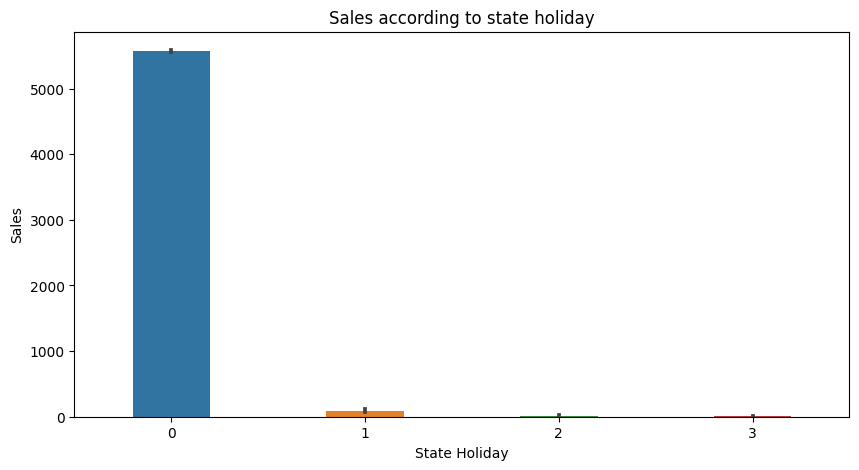

In [47]:
# Chart - 4
# SALES ACCORDING TO STATE HOLIDAY

sns.barplot(x='StateHoliday', y='Sales', data=new_df, width=0.4)
plt.title('Sales according to state holiday')
plt.xlabel('State Holiday')
plt.ylabel('Sales')


plt.show()

**1. I chose barchart here to compare the relations between two variables very effectively. To compare sales, bar chart is widely used.**

**2. In the above shown chart, 'x' axis represents Sales and 'y' axis represents State holdiay.
Here, 0 = None, 1 = Public Holiday, 2= Easter Hoilday, 3 = Christmas
So, the sales is maximum in no holidays and very low sales on public holiday. Easter and christmas holidays have no sales.**

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

 **State holidays have directly impact on sales and revenues of the company.**

#### Chart - 5

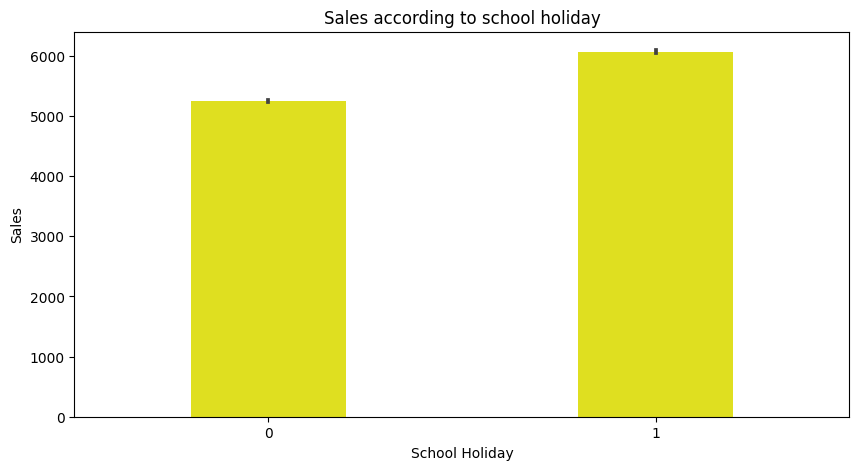

In [48]:
# Chart - 5 visualization code
#SALES ACCORDING TO SCHOOL HOLIDAY

sns.barplot(x = 'SchoolHoliday', y = 'Sales', data=new_df, width=0.4, color='Yellow')
plt.title('Sales according to school holiday')
plt.xlabel('School Holiday')
plt.ylabel('Sales')


plt.show()

**1. Bar plot is used here to show the sales according to school holiday.**

**2. In the above shown chart, 'x' axis represents school holiday and 'y' axis represents sales. In the previous chart, we observe that sales were highest when there was no state holiday but in this chart sales is highest when there is a school holiday.**

**3. This chart shows positive signs as there is very little difference between school holiday or no school holiday.**

#### Chart - 6

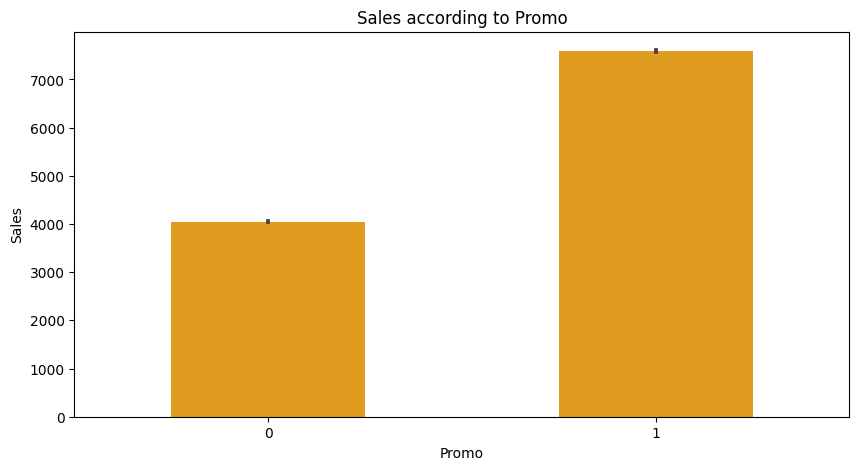

In [49]:
# Chart - 6
# SALES ACCORDING TO PROMO

sns.barplot(x = 'Promo', y = 'Sales', data= new_df, width = .5, color = 'Orange')
plt.title('Sales according to Promo')
plt.xlabel('Promo')
plt.ylabel('Sales')

plt.show()

**1. Bar chart is used here to show the relation between sales and promo.**

**2. In the above chart, 'x' axis represents Promo done by the company and 'y' axis represents sales of the company.
In xlabel promo, 0 indicates no promo and 1 indicates promo.
Here, we can observe that sales were at maximum level when company ran promo. Sales was half when there was no promo**


**3. Company will increase its revenue twice when it will initiate promo.**

#### Chart - 7

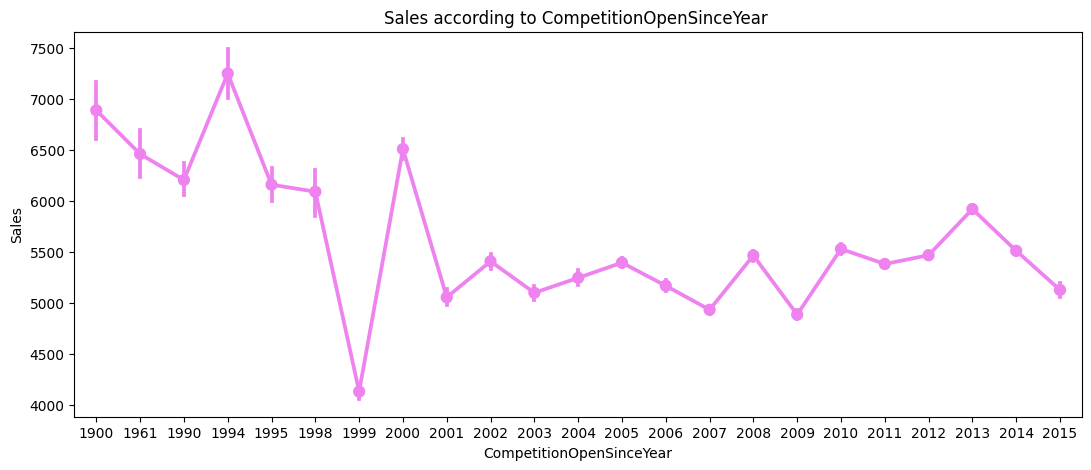

In [50]:
# Chart - 7
# SALES ACCORDING TO CompetitionOpenSinceYear

plt.figure(figsize=(13,5))
sns.pointplot(x = 'CompetitionOpenSinceYear', y = 'Sales', data=new_df, color='Violet')
plt.title('Sales according to CompetitionOpenSinceYear ')
plt.xlabel('CompetitionOpenSinceYear')
plt.ylabel('Sales')

plt.show()

##### 1. Why did you pick the specific chart?

**Line chart is used here to show the trend of sales against competition open since year.**

##### 2. What is/are the insight(s) found from the chart?

**In the shown chart, 'x' axis represents competition open since year and 'y' axis represents Sales. Here, we observe that sales increased in 1994 and there is sudden downfall in year 1999.  Sales again increased in the year 2000 and thereafter, sales are at moderate rate.**

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

**In 2015, sales decreased at 5000 from 6000 which is a negative signs for company. Company need to come up with more strong ideas to compete with its competitor.**

#### Chart - 8

Text(0.5, 1.0, 'Store kept open during a week')

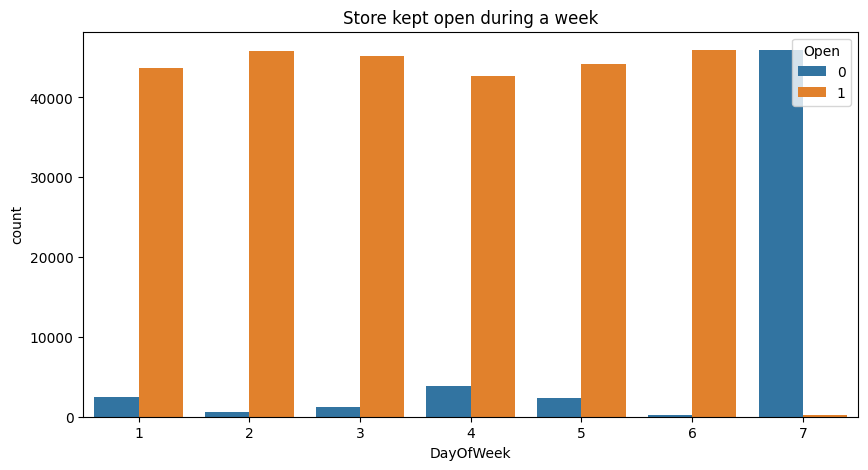

In [51]:
# Chart - 8 visualization code
plt.figure(figsize=(10, 5))
sns.countplot(x= 'DayOfWeek', hue='Open', data= new_df)
plt.title('Store kept open during a week')

##### 1. Why did you pick the specific chart?

**Group bar chart is used here to compare two values together with another variable .**

##### 2. What is/are the insight(s) found from the chart?

**In the above shown chart, 'x' axis represents days of week which compares whether store is open or not. Here, 0 means the store is closed and 1 means store is oped during the day. From the chart, we observe that store is opened during the weekdays and closed on the weekend. Stores are also closed sometimes on weekdays maybe due to state or school holidays.**

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

**There are positive signs as store is mostly kept open.**

#### Chart - 9

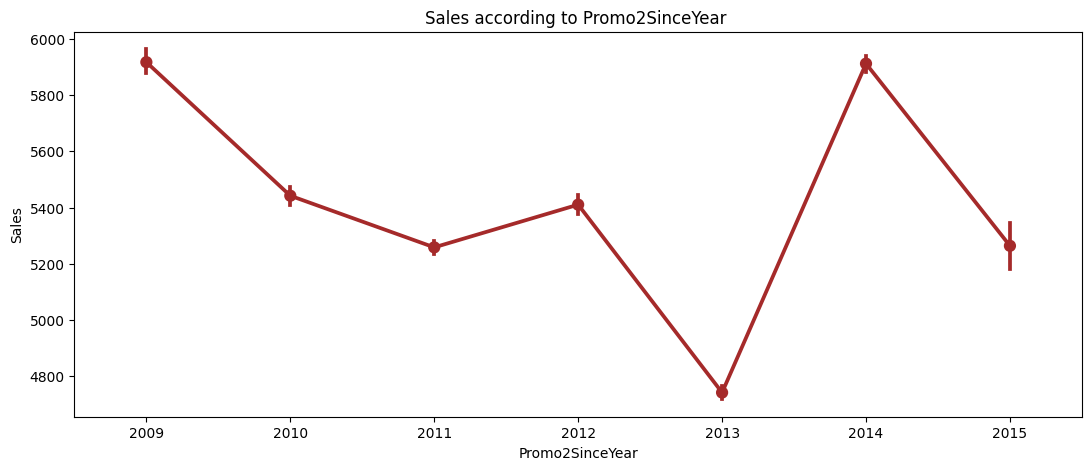

In [52]:
# Chart - 9
# SALES ACCORDING TO PROMO2 SINCE YEAR

plt.figure(figsize=(13,5))
sns.pointplot(x = 'Promo2SinceYear', y = 'Sales', data=new_df, color='Brown')
plt.title('Sales according to Promo2SinceYear ')
plt.xlabel('Promo2SinceYear')
plt.ylabel('Sales')

plt.show()

**1. Line chart is used to show the trend of sales during promo 2 since years.**

**2. In the shown figure, 'x' axis represents promo 2 since year and 'y' axis represents sales. In 2009, promo2 worked excellent as sales were high and it decreases gradually and in 2013, sales were at lowest and ended up at sales of 5300 in 2015.**

**3. There are negative signs as sales are not doing good even with promo2.**

#### Chart - 10

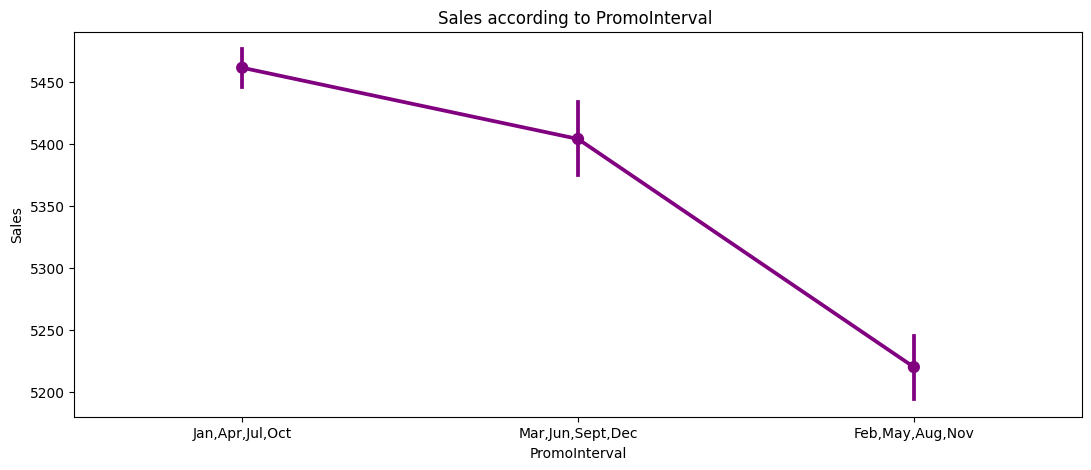

In [53]:
# Chart - 10
# SALES ACCORDING TO PROMO INTERVAL

plt.figure(figsize=(13,5))
sns.pointplot(x = 'PromoInterval', y = 'Sales', data=new_df, color='Purple')
plt.title('Sales according to PromoInterval ')
plt.xlabel('PromoInterval')
plt.ylabel('Sales')

plt.show()

**1. Line chart is used to show the trend of sales in interval of promo.**

**2. In the above chart, 'x' axis represents promo interval and 'y' axis represents sales. In the phase of Jan,Apr,Jul,Oct, sales are highest followed by Mar,Jun,Sept,Dec and lowest sales are recorded in Feb,May,Aug,Nov.**

**3. Promo should be improved in interval of Feb,May.Aug,Nov to increase sales.**

#### Chart - 11

In [54]:
# Chart - 11
# CUSTOMERS AND SALES ACCORDING TO ITS STORE TYPE

store_types=new_df.groupby(['StoreType'])['Customers','Sales'].sum().reset_index()
store_types.sort_values(by=['Customers','Sales'],ascending=False, ignore_index=True)
store_types=store_types.set_index('StoreType')
store_types

<ipython-input-54-90250d592846>:4: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  store_types=new_df.groupby(['StoreType'])['Customers','Sales'].sum().reset_index()


,Customers,Sales
StoreType,,
0,106056480,962445137
2,25379216,220746618
3,48226572,567836385


<Axes: xlabel='StoreType'>

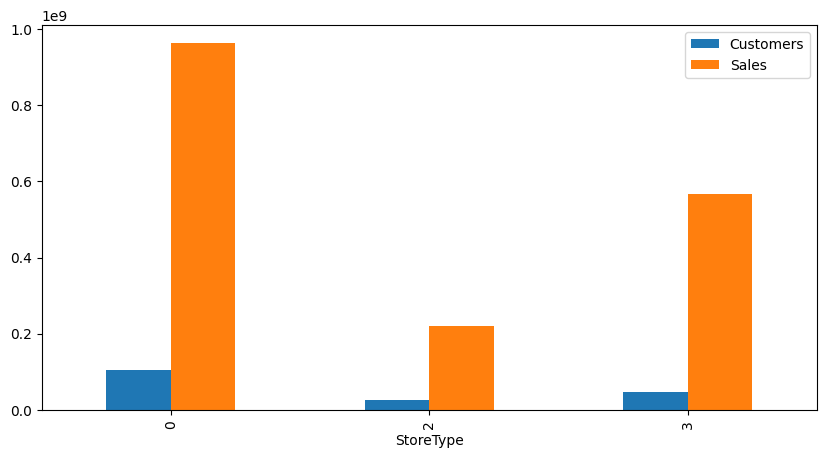

In [55]:
plt.rcParams['figure.figsize'] = (10, 5)
store_types.plot(kind='bar')

**1. Grouped bar chart is used to show two variables (Customers & Sales) with storetype.**

**2. In the above shown figure, 'x' axis represents store type. There are 3 types of stores named 0,2,3. Store 0 has recorded highest sales while store 2 has recorded lowest sales. Same in case of customers, Store 0 has recorded highest customers while store 2 has recorded lowest customers.**

**2. Company should focus on increasing customers to increase sales.**

#### Chart - 12

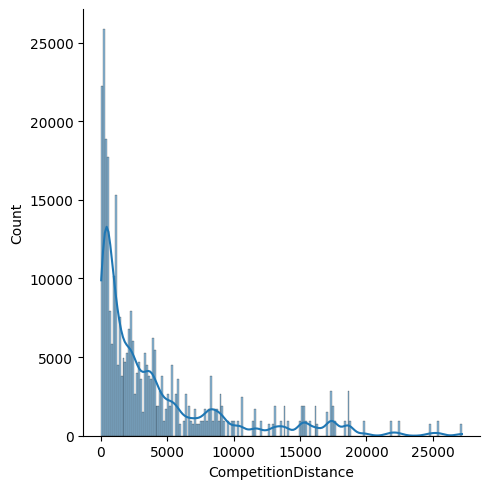

In [56]:
# Chart - 12
#COMPETITION DISTANCE

sns.displot(data=new_df, x='CompetitionDistance', kde=True)

**1. Distribution chart is used to show the distribution of distance of competition.**



**2. Here, 'x' axis represents competition distance. We can observe in this chart that most competitiors are found within 5000 meters range of the company.**

## ***6. Hypothesis Testing***

### Based on your chart experiments, define three hypothetical statements from the dataset. In the next three questions, perform hypothesis testing to obtain final conclusion about the statements through your code and statistical testing.

### Hypothetical Statement - 1

**STATISTICAL TEST TO DETERMINE WHETHER THE AVERAGE DISTANCE OF COMPETITION IS LESS THAN 4000 km.**

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

###I am testing -
 *H0*: µ = 4000 vs *H1*: µ < 4000










#### 2. Perform an appropriate statistical test.

In [57]:
# Perform Statistical Test to obtain P-Value
import statistics as st
from scipy.stats import ttest_1samp

#CREATING SAMPLE OF DISTANCE OF COMPETITION
competition_distance = [1420, 5380, 250, 350, 8880, 280, 2060, 6900, 2380, 1650]

# Calculating the mean of the sample
mean = np.mean(competition_distance)
mean

# Performing the T-Test
t_test, p_val = ttest_1samp(competition_distance, 4000)
print("P-value is: ", p_val)

# taking the threshold value as 0.05 or 5%
if p_val < 0.05:
    print(" We can reject the null hypothesis")
else:
    print("We can accept the null hypothesis")



P-value is:  0.30479513737256925
We can accept the null hypothesis


##### Which statistical test have you done to obtain P-Value?

I have done one sample t-test to obtain p-value.

##### Why did you choose the specific statistical test?

My objective was to compare one variable against a standard value, therefore, I choose one sample t-test.

### Hypothetical Statement - 2

**STATISTICAL TEST TO DETERMINE WHETHER AVERAGE CUSTOMERS FOR STORE TYPE 2 IS GREATER THAN 2,50,00,000.**

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

###I am testing -
 *H0*: µ = 25000000 vs *H1*: µ > 25000000

#### 2. Perform an appropriate statistical test.

In [58]:
# Perform Statistical Test to obtain P-Value
#CREATING SAMPLE OF DISTANCE OF COMPETITION
Customers_sample=new_df['Customers'].sample(n=25, random_state=1)

# Calculating the mean of the sample
mean = np.mean(Customers_sample)
mean

# Performing the T-Test
t_test, p_val = ttest_1samp(Customers_sample, 25000000)
print("P-value is: ", p_val)

# taking the threshold value as 0.05 or 5%
if p_val < 0.05:
    print(" We can reject the null hypothesis")
else:
    print("We can accept the null hypothesis")

P-value is:  3.9408056187364806e-115
 We can reject the null hypothesis


##### Which statistical test have you done to obtain P-Value?

I have done one sample t-test to obtain p-value.

##### Why did you choose the specific statistical test?

My objective was to compare one variable against a standard value, therefore, I choose one sample t-test.

### Hypothetical Statement - 3

**STATISTICAL TEST TO DETERMINE WHETHER AVERAGE SALES IS GREATER THAN 8000.**

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

###I am testing -
H0: µ = 8000 vs H1: µ > 8000

#### 2. Perform an appropriate statistical test.

In [59]:
 # Perform Statistical Test to obtain P-Value
#CREATING SAMPLE OF DISTANCE OF COMPETITION
Sales_sample=new_df['Sales'].sample(n=30, random_state=1)

# Calculating the mean of the sample
mean = np.mean(Sales_sample)
mean

# Performing the T-Test
t_test, p_val = ttest_1samp(Sales_sample, 8000)
print("P-value is: ", p_val)

# taking the threshold value as 0.05 or 5%
if p_val < 0.05:
    print(" We can reject the null hypothesis")
else:
    print("We can accept the null hypothesis")

P-value is:  0.0008492967068833334
 We can reject the null hypothesis


##### Which statistical test have you done to obtain P-Value?

I have done one sample t-test to obtain p-value.

##### Why did you choose the specific statistical test?

My objective was to compare one variable against a standard value, therefore, I choose one sample t-test.

## ***7. Feature Engineering & Data Pre-processing***

### 1. Handling Missing Values

In [60]:
# Handling Missing Values & Missing Value Imputation

#### What all missing value imputation techniques have you used and why did you use those techniques?

Answer Here.

### 2. Handling Outliers

In [61]:
# Handling Outliers & Outlier treatments

##### What all outlier treatment techniques have you used and why did you use those techniques?

Answer Here.

### 3. Categorical Encoding

In [62]:
# Encode your categorical columns

#### What all categorical encoding techniques have you used & why did you use those techniques?

Answer Here.

### 4. Textual Data Preprocessing
(It's mandatory for textual dataset i.e., NLP, Sentiment Analysis, Text Clustering etc.)

#### 1. Expand Contraction

In [63]:
# Expand Contraction

#### 2. Lower Casing

In [64]:
# Lower Casing

#### 3. Removing Punctuations

In [65]:
# Remove Punctuations

#### 4. Removing URLs & Removing words and digits contain digits.

In [66]:
# Remove URLs & Remove words and digits contain digits

#### 5. Removing Stopwords & Removing White spaces

In [67]:
# Remove Stopwords

In [68]:
# Remove White spaces

#### 6. Rephrase Text

In [69]:
# Rephrase Text

#### 7. Tokenization

In [70]:
# Tokenization

#### 8. Text Normalization

In [71]:
# Normalizing Text (i.e., Stemming, Lemmatization etc.)

##### Which text normalization technique have you used and why?

Answer Here.

#### 9. Part of speech tagging

In [72]:
# POS Taging

#### 10. Text Vectorization

In [73]:
# Vectorizing Text

##### Which text vectorization technique have you used and why?

Answer Here.

### 4. Feature Manipulation & Selection

#### 1. Feature Manipulation

In [74]:
# Manipulate Features to minimize feature correlation and create new features

#### 2. Feature Selection

In [75]:
# Select your features wisely to avoid overfitting

##### What all feature selection methods have you used  and why?

Answer Here.

##### Which all features you found important and why?

Answer Here.

### 5. Data Transformation

#### Do you think that your data needs to be transformed? If yes, which transformation have you used. Explain Why?

In [76]:
# Transform Your data

### 6. Data Scaling

In [77]:
# Scaling your data

##### Which method have you used to scale you data and why?

### 7. Dimesionality Reduction

##### Do you think that dimensionality reduction is needed? Explain Why?

Answer Here.

In [78]:
# DImensionality Reduction (If needed)

##### Which dimensionality reduction technique have you used and why? (If dimensionality reduction done on dataset.)

Answer Here.

### 8. Data Splitting

In [79]:
# Split your data to train and test. Choose Splitting ratio wisely.

##### What data splitting ratio have you used and why?

Answer Here.

### 9. Handling Imbalanced Dataset

##### Do you think the dataset is imbalanced? Explain Why.

Answer Here.

In [80]:
# Handling Imbalanced Dataset (If needed)

##### What technique did you use to handle the imbalance dataset and why? (If needed to be balanced)

Answer Here.

## ***8. ML Model Implementation***

### ML Model - 1

In [81]:
# ML Model - 1 Implementation

# Fit the Algorithm

# Predict on the model

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

In [82]:
# Visualizing evaluation Metric Score chart

#### 2. Cross- Validation & Hyperparameter Tuning

In [83]:
# ML Model - 1 Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)

# Fit the Algorithm

# Predict on the model

##### Which hyperparameter optimization technique have you used and why?

Answer Here.

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

Answer Here.

### ML Model - 2

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

In [84]:
# Visualizing evaluation Metric Score chart

#### 2. Cross- Validation & Hyperparameter Tuning

In [85]:
# ML Model - 1 Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)

# Fit the Algorithm

# Predict on the model

##### Which hyperparameter optimization technique have you used and why?

Answer Here.

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

Answer Here.

#### 3. Explain each evaluation metric's indication towards business and the business impact pf the ML model used.

Answer Here.

### ML Model - 3

In [86]:
# ML Model - 3 Implementation

# Fit the Algorithm

# Predict on the model

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

In [87]:
# Visualizing evaluation Metric Score chart

#### 2. Cross- Validation & Hyperparameter Tuning

In [88]:
# ML Model - 3 Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)

# Fit the Algorithm

# Predict on the model

##### Which hyperparameter optimization technique have you used and why?

Answer Here.

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

Answer Here.

### 1. Which Evaluation metrics did you consider for a positive business impact and why?

Answer Here.

### 2. Which ML model did you choose from the above created models as your final prediction model and why?

Answer Here.

### 3. Explain the model which you have used and the feature importance using any model explainability tool?

Answer Here.

## ***9.*** ***Future Work (Optional)***

### 1. Save the best performing ml model in a pickle file or joblib file format for deployment process.


In [89]:
# Save the File

### 2. Again Load the saved model file and try to predict unseen data for a sanity check.


In [90]:
# Load the File and predict unseen data.

### ***Congrats! Your model is successfully created and ready for deployment on a live server for a real user interaction !!!***

# **Conclusion**

Write the conclusion here.

### ***Hurrah! You have successfully completed your Machine Learning Capstone Project !!!***